In [1]:
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import trading as trd

In [3]:
# relaod module after modifying it
import importlib
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [6]:
STOCK_DATA_LOC = join('..', 'data')
stocks = ['aapl', 'goog', 'tsla', 'ko', 'pfe', 'ibm', 'xom', 'tasr', 'intc']

In [7]:
trd.download_stock_histories(STOCK_DATA_LOC, stocks, start_date=np.datetime64('2011-01-01'))

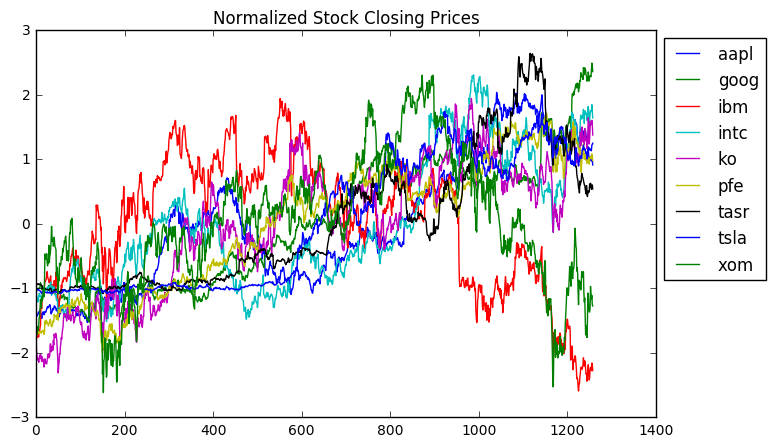

In [9]:
stock_files = glob.glob(join(STOCK_DATA_LOC, '*.csv'))
tickers = dict()

f = plt.figure(figsize=(8, 5))
ax = f.gca()

for f in stock_files: 
    s = splitext(basename(f))[0]
    c = trd.read_stock_history(f)
    # standardize data for plotting / comparrison
    d = pd.DataFrame(data={'CloseNorm': preprocessing.scale(c), 'Close':c})
    tickers[s] = d
    
    ax.plot(preprocessing.scale(d['CloseNorm']), label=s)

ax.set_title('Normalized Stock Closing Prices')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)